## Notebook for Understanding Provided Data
## Possible endpoints ? 



In [71]:
import pandas as pd 
import matplotlib 
from matplotlib import pyplot as plt
df = pd.read_csv('Eluvio_DS_Challenge.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
time_created    509236 non-null int64
date_created    509236 non-null object
up_votes        509236 non-null int64
down_votes      509236 non-null int64
title           509236 non-null object
over_18         509236 non-null bool
author          509236 non-null object
category        509236 non-null object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [89]:
## Basic Preprocess
titles = df['title']
lt = [len(t) for t in titles ]
df['len_titles'] = lt

df['date_created'] = pd.to_datetime(df['date_created'])
df['time_created'] = pd.to_timedelta(df['time_created'], unit='s')
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,len_titles
0,13903 days 03:34:06,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,33
1,13903 days 03:34:35,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,32
2,13903 days 03:42:03,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,31
3,13903 days 03:54:50,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,44
4,13903 days 15:25:20,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,47


In [90]:
print('\n Total Unique Authors : \t', len(df['author'].unique()))
print('\n Total Unique Categories : \t', len(df['category'].unique()))
print('\n Total True in over_18 : \t', df[df['over_18']==True]['over_18'].count(), ' False: \t',df[df['over_18']==False]['over_18'].count())
print('\n up_votes range: \t Min:', df['up_votes'].min(), '   Max:', df['up_votes'].max(), '   Mean:' ,df['up_votes'].mean() , '   Mode:' ,df.mode()['up_votes'] )
print('\n down_votes range : \t Min:', df['down_votes'].min(), '   Max:',df['down_votes'].max(), '   Mean:' ,df['down_votes'].mean(), '   Mode:'  ,df.mode()['down_votes'] )
print('\n Range Dates: \t Min:', df['date_created'].min(), '   Max:', df['date_created'].max(), '   range:', df['date_created'].max() - df['date_created'].min())
print('\n Range time_created: \t Min:', df['time_created'].min(), '   Max:', df['time_created'].max(), '   range:', df['time_created'].max() - df['time_created'].min())

print('\n Title range : \t Min:', df['len_titles'].min(), '   Max:',df['len_titles'].max(), '   Mean:',df['len_titles'].mean(), '   Mode:' ,df['len_titles'].mode()  )

print('\n Title min: \t', df[df['len_titles'] == df['len_titles'].min()])
print('\n Title max: \t', df[df['len_titles'] == df['len_titles'].max()])




 Total Unique Authors : 	 85838

 Total Unique Categories : 	 1

 Total True in over_18 : 	 320  False: 	 508916

 up_votes range: 	 Min: 0    Max: 21253    Mean: 112.23628337352426    Mode: 0    0
Name: up_votes, dtype: int64

 down_votes range : 	 Min: 0    Max: 0    Mean: 0.0    Mode: 0    0
Name: down_votes, dtype: int64

 Range Dates: 	 Min: 2008-01-25 00:00:00    Max: 2016-11-22 00:00:00    range: 3224 days 00:00:00

 Range time_created: 	 Min: 13903 days 03:34:06    Max: 17127 days 12:22:26    range: 3224 days 08:48:20

 Title range : 	 Min: 1    Max: 320    Mean: 89.44608197378032    Mode: 0    59
dtype: int64

 Title min: 	               time_created date_created  up_votes  down_votes title  over_18  \
19681  14205 days 03:54:38   2008-11-22         0           0     ?    False   
184330 15851 days 04:28:10   2013-05-26         0           0     .    False   

          author   category  len_titles  
19681      lilaz  worldnews           1  
184330  dkffkfhf  worldnews      

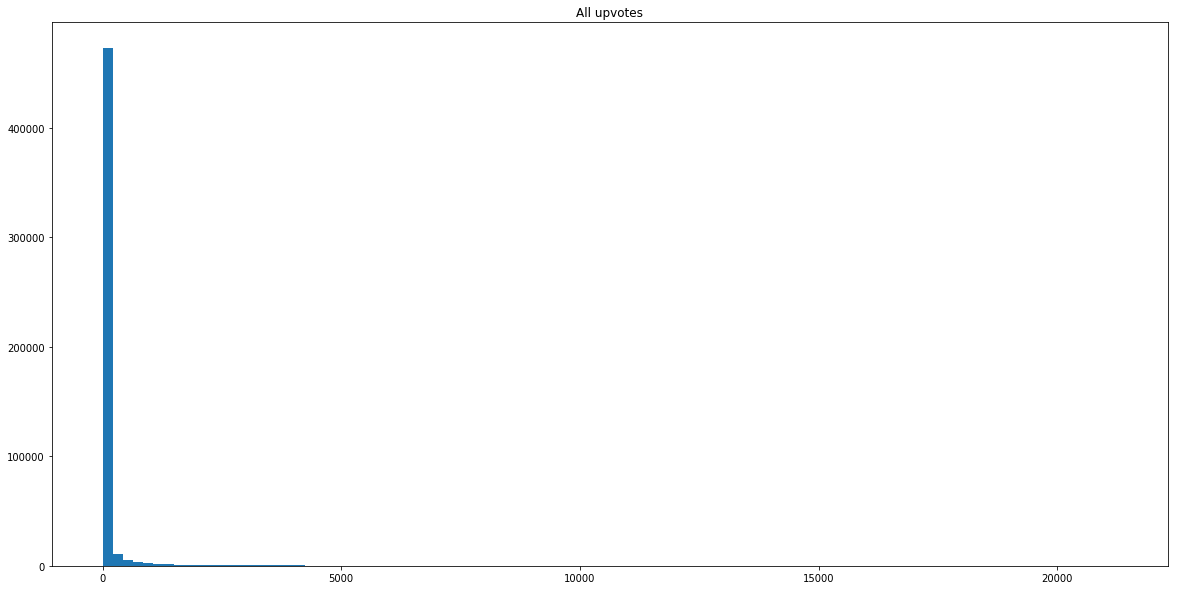

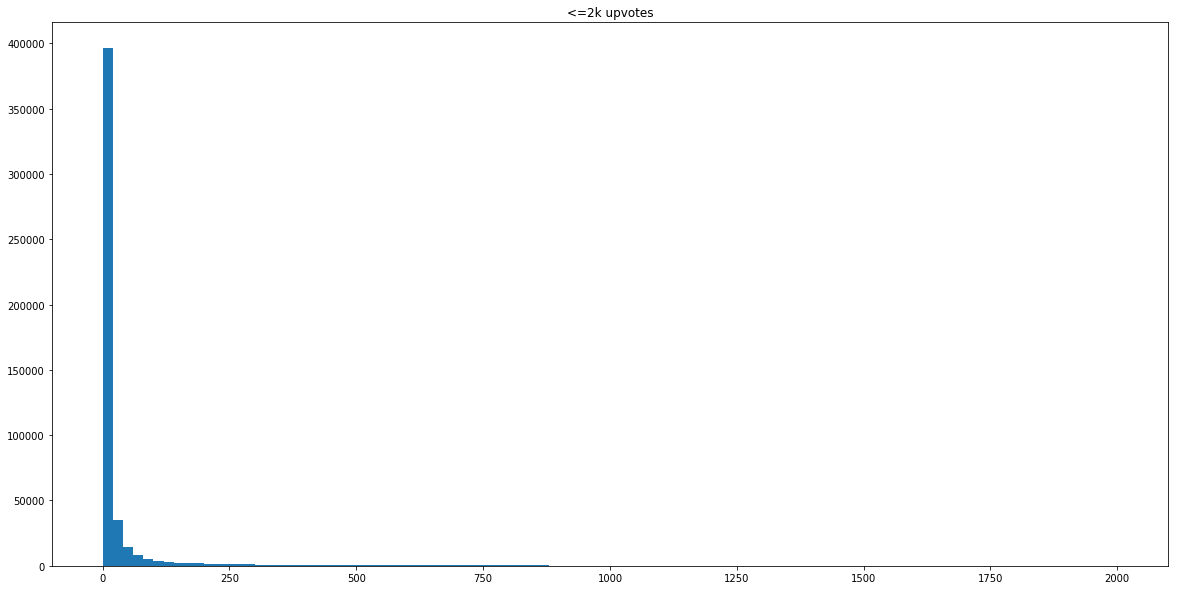

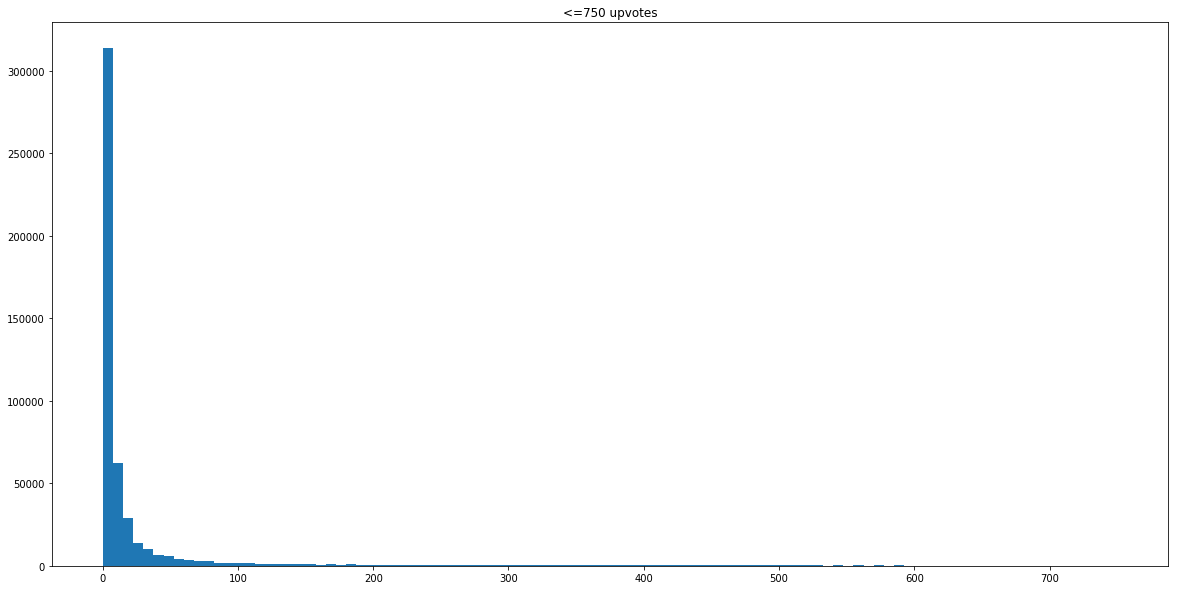

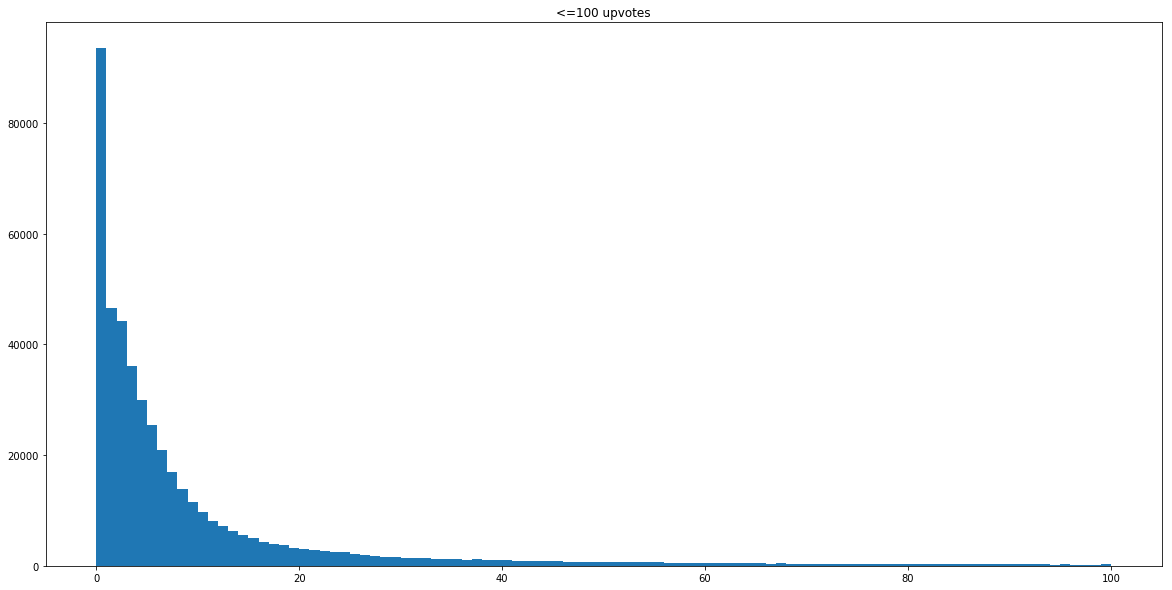

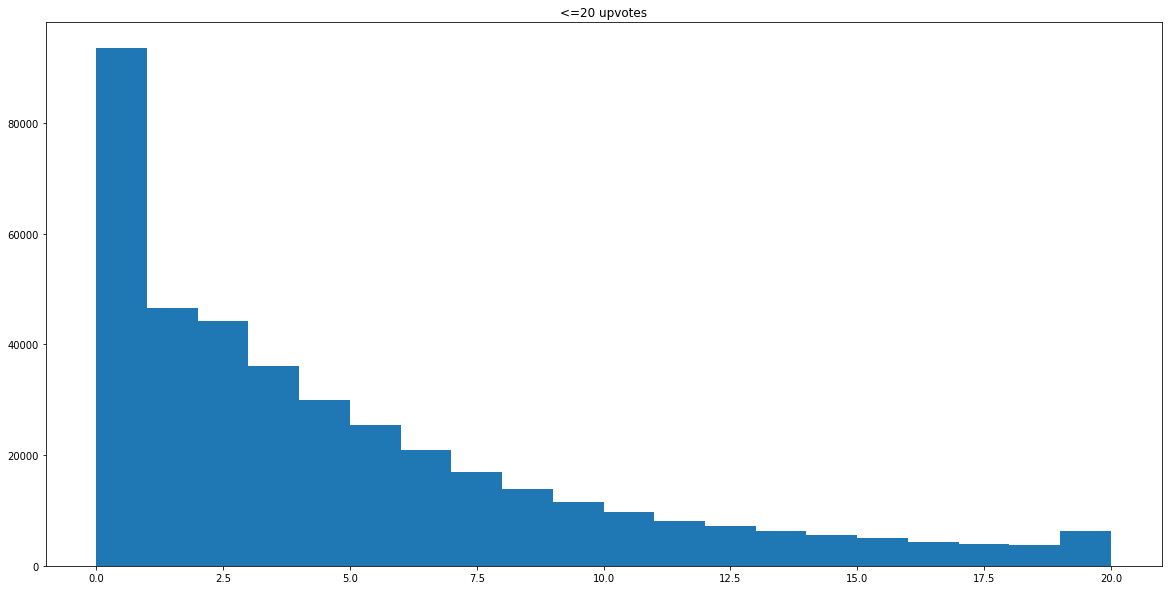

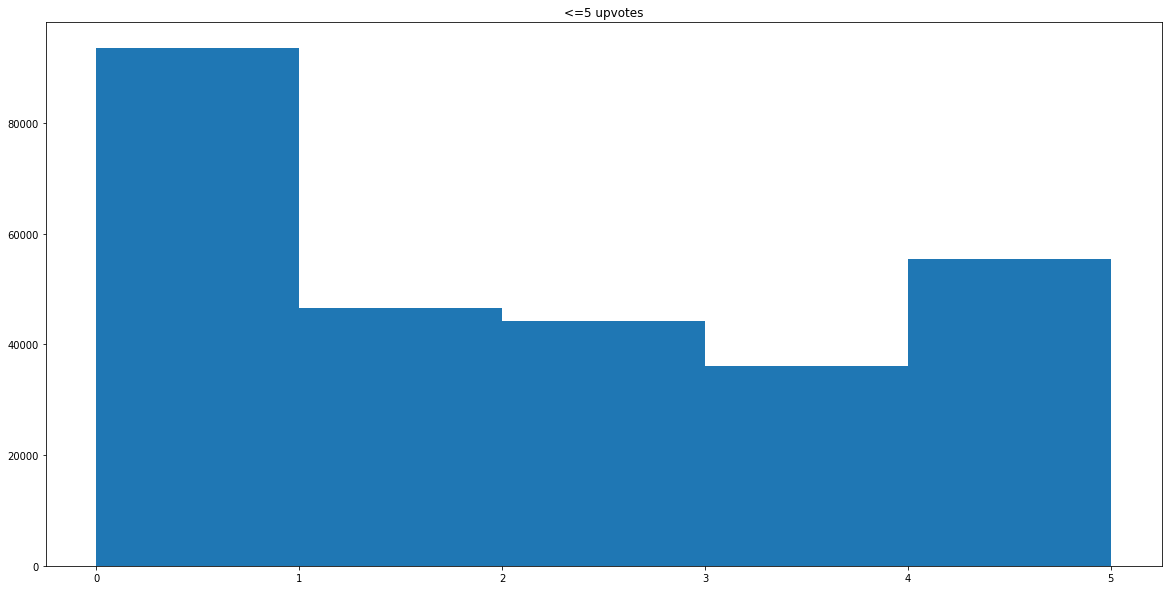

In [86]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df['up_votes'], bins=100)
plt.title('All upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=2000]['up_votes'] , bins=100)
plt.title('<=2k upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=750]['up_votes'] , bins=100)
plt.title('<=750 upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=100]['up_votes'] , bins=100)
plt.title('<=100 upvotes')
plt.show()
plt.hist(df[df['up_votes'] <=20]['up_votes'] , bins=20)
plt.title('<=20 upvotes')
plt.show()

plt.hist(df[df['up_votes'] <=5]['up_votes'] , bins=5)
plt.title('<=5 upvotes')
plt.show()

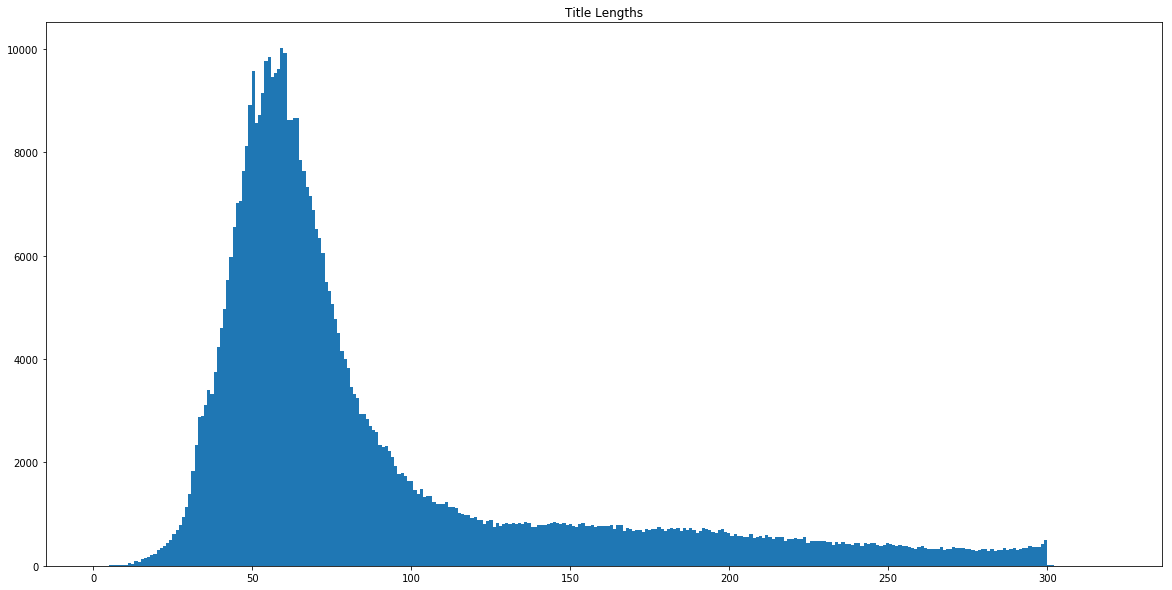

In [91]:

plt.hist(df[df['len_titles'] <=400]['len_titles'] , bins=320)
plt.title('Title Lengths')
plt.show()

1 8897 [8897, 5730, 5037, 4023, 4013, 3170, 2923, 2658, 2564, 2503, 2493, 2448, 2405, 2181, 2108, 2077, 1897, 1770, 1698, 1649, 1616, 1562, 1516, 1490, 1399, 1397, 1223, 1199, 1183, 1180, 1170, 1094, 1092, 1016, 1012, 1000, 994, 979, 970, 962, 952, 938, 936, 915, 903, 892, 886, 883, 863, 851]


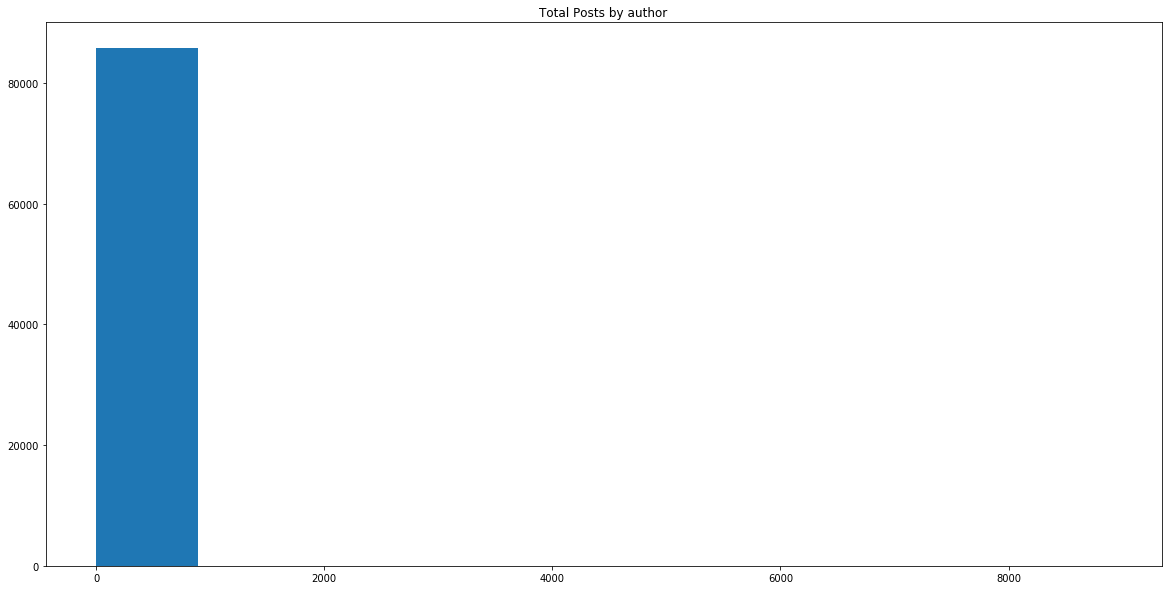

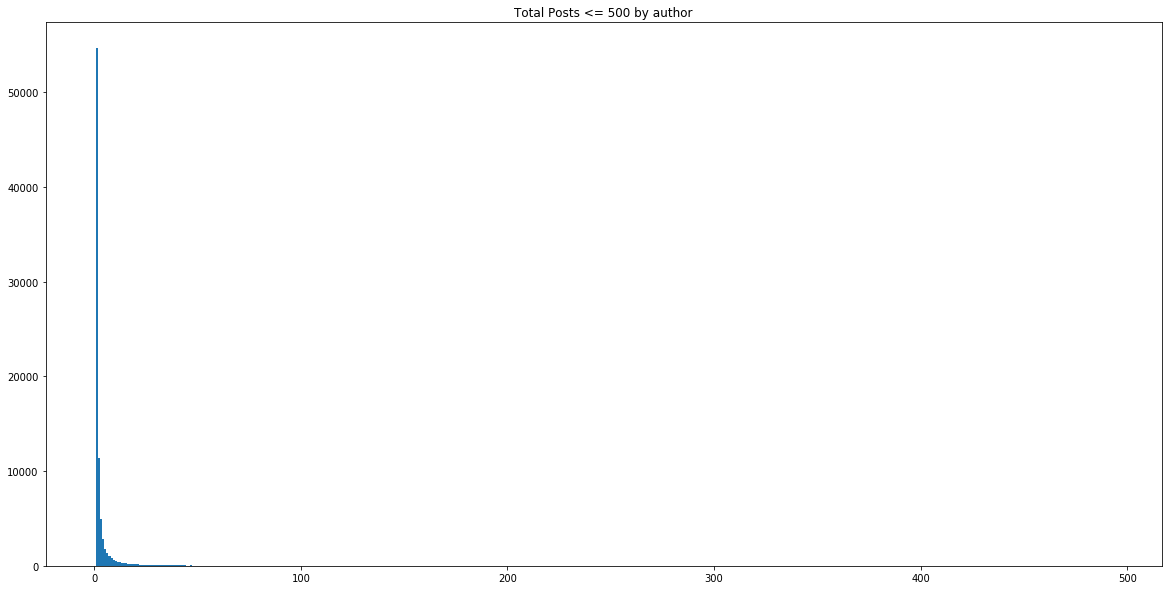

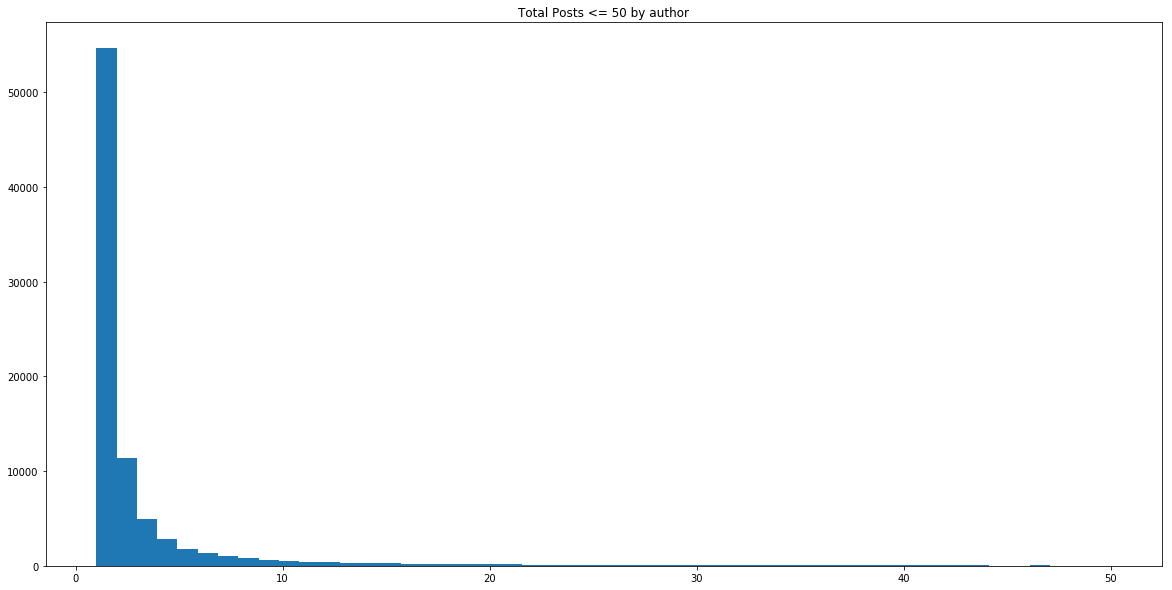

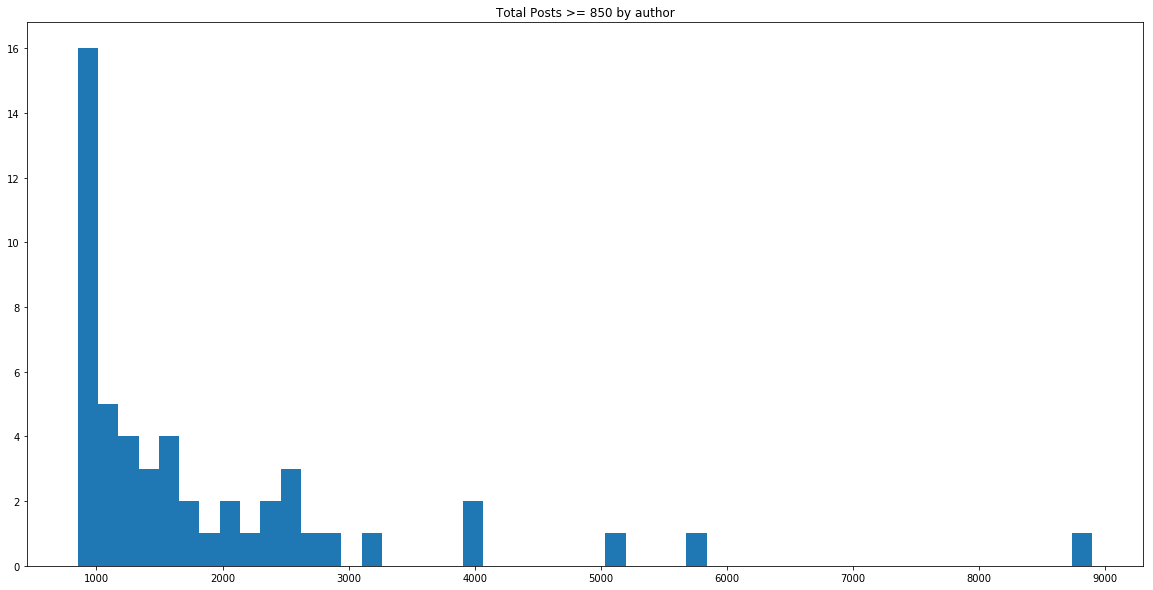

In [120]:
tmp = tdf['author'].value_counts()
print(tmp.min(), tmp.max(), sorted(tmp, reverse=True)[:50] )

plt.hist(tmp, bins=10)
plt.title('Total Posts by author')
plt.show()
plt.hist(tmp[tmp<=500], bins=500)
plt.title('Total Posts <= 500 by author')
plt.show()

plt.hist(tmp[tmp<=50], bins=50)
plt.title('Total Posts <= 50 by author')
plt.show()

plt.hist(tmp[tmp>=850], bins=50)
plt.title('Total Posts >= 850 by author')
plt.show()

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['title'], 20)

the 212420
to 212195
in 208504
of 174552
and 87003
for 80271
on 73542
is 42733
with 39449
as 39168
by 37706
from 35254
at 32545
that 29434
has 29216
after 29167
china 26397
says 25432
over 25094
us 24918


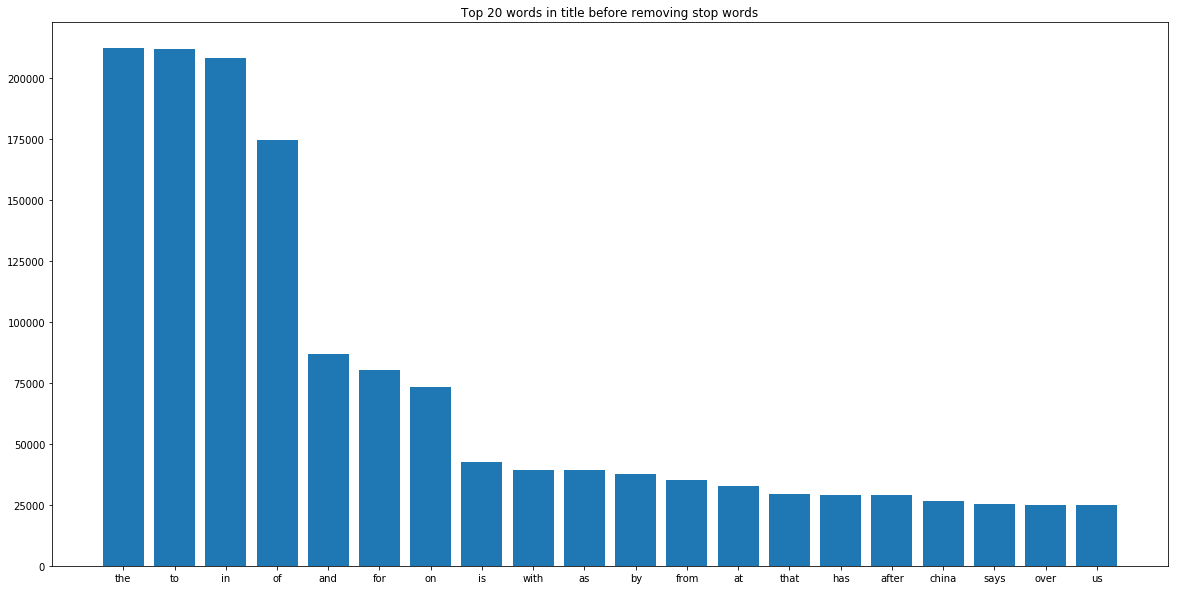

In [131]:
for word, freq in common_words:
    print(word, freq)
plt.bar([v[0] for v in common_words], [v[1] for v in common_words])
plt.title('Top 20 words in title before removing stop words')
plt.show()

In [132]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['title'], 20)

china 26397
says 25432
new 23388
syria 19023
russia 18766
world 18091
police 16654
government 16305
israel 16048
iran 15816
president 15271
killed 14328
people 13991
state 13489
attack 12925
war 12820
russian 12378
military 11828
uk 11784
north 11589


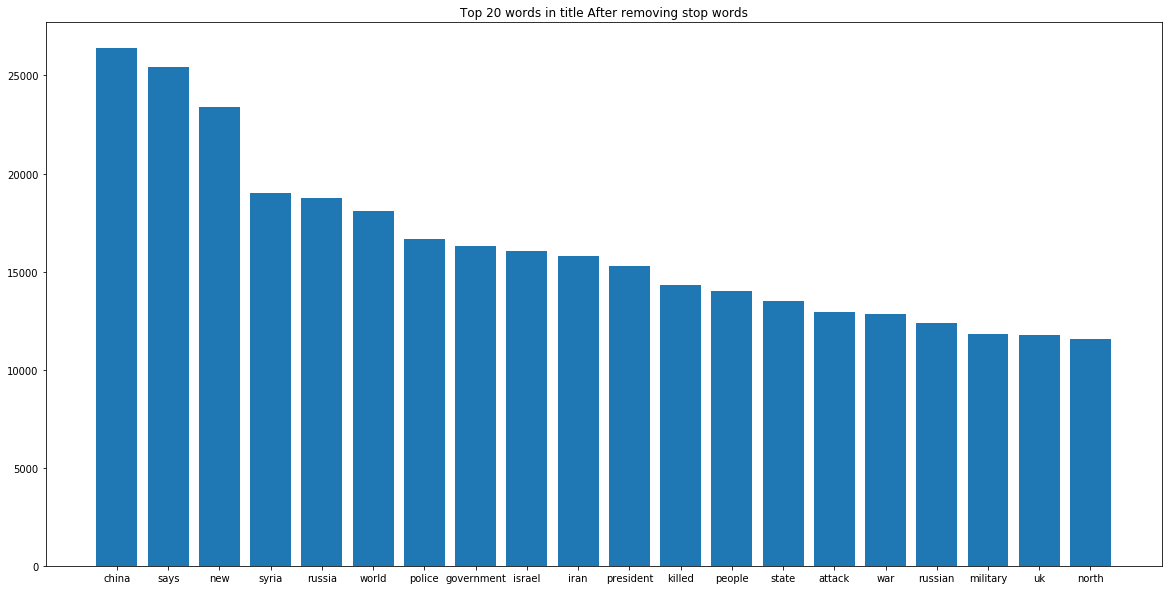

In [133]:
for word, freq in common_words:
    print(word, freq)
plt.bar([v[0] for v in common_words], [v[1] for v in common_words])
plt.title('Top 20 words in title After removing stop words')
plt.show()

In [137]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_bigram = get_top_n_bigram(df['title'], 20)

In [138]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_trigram = get_top_n_trigram(df['title'], 20)

north korea 7111
islamic state 5309
prime minister 4797
bbc news 4173
year old 3780
human rights 3547
saudi arabia 3493
south korea 2701
al qaeda 2638
climate change 2284
united states 2221
hong kong 2062
middle east 1828
china sea 1747
west bank 1735
boko haram 1678
south china 1630
south africa 1610
north korean 1533
new zealand 1521


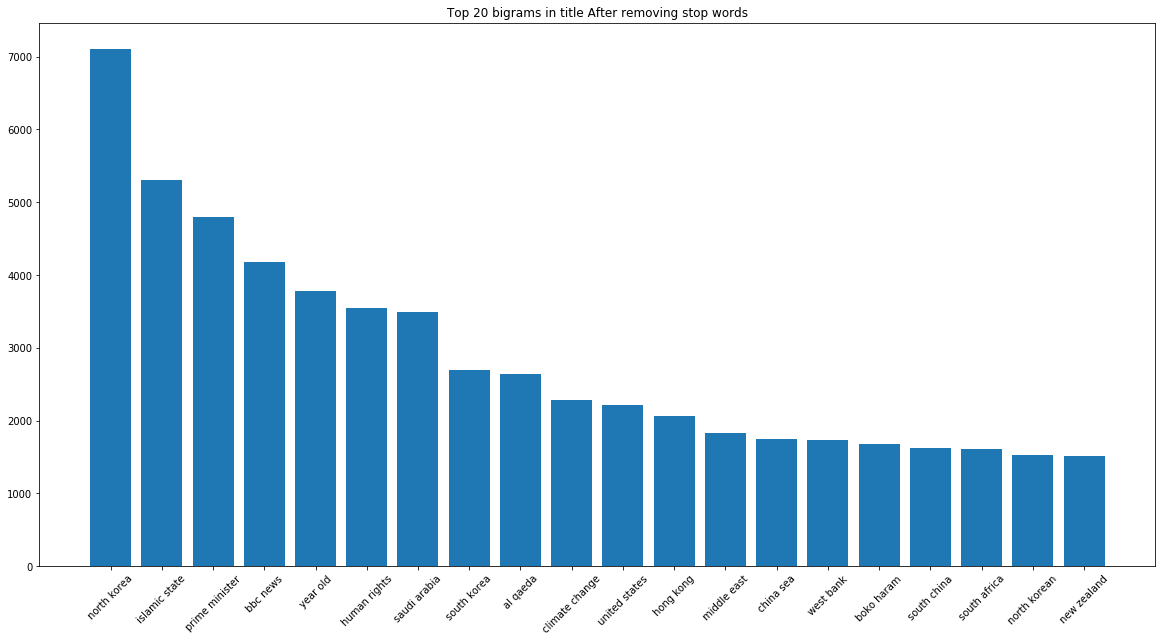

south china sea 1062
bashar al assad 422
central african republic 381
al jazeera english 313
president bashar al 282
human rights watch 253
international criminal court 217
new york times 207
osama bin laden 206
islamic state militants 205
death toll rises 202
world war ii 189
nuclear power plant 185
islamic state group 183
year old girl 182
nobel peace prize 180
aung san suu 178
san suu kyi 177
president vladimir putin 176
ban ki moon 175


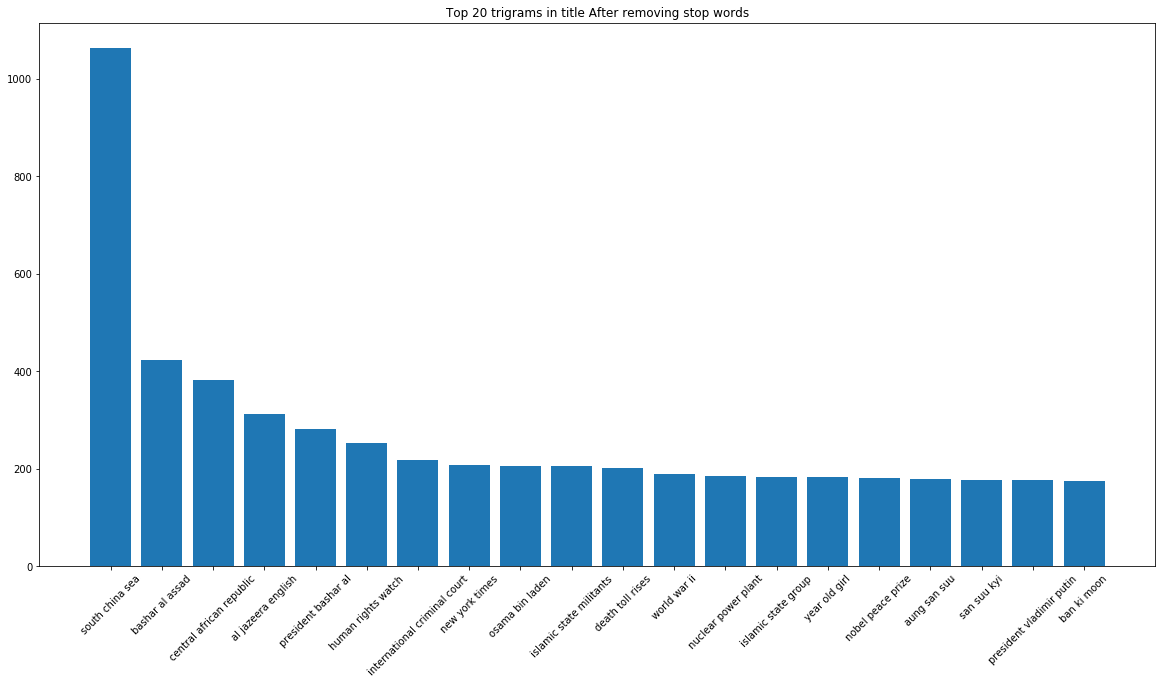

In [144]:
for word, freq in common_words_bigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_bigram], [v[1] for v in common_words_bigram])
plt.title('Top 20 bigrams in title After removing stop words')
plt.xticks(rotation=45)
plt.show()
for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 20 trigrams in title After removing stop words')
plt.xticks(rotation=45)
plt.show()

south china sea 236
osama bin laden 116
bashar al assad 108
central african republic 99
al jazeera english 97
nobel peace prize 95
iran nuclear deal 66
human rights watch 63
year old girl 63
president barack obama 62
malaysia airlines flight 62
kim jong il 61
president bashar al 59
ban ki moon 57
north korea threatens 56
news flash summary 55
evening news flash 55
stories uk links 55
uk links associated 55
summary quick summary 55


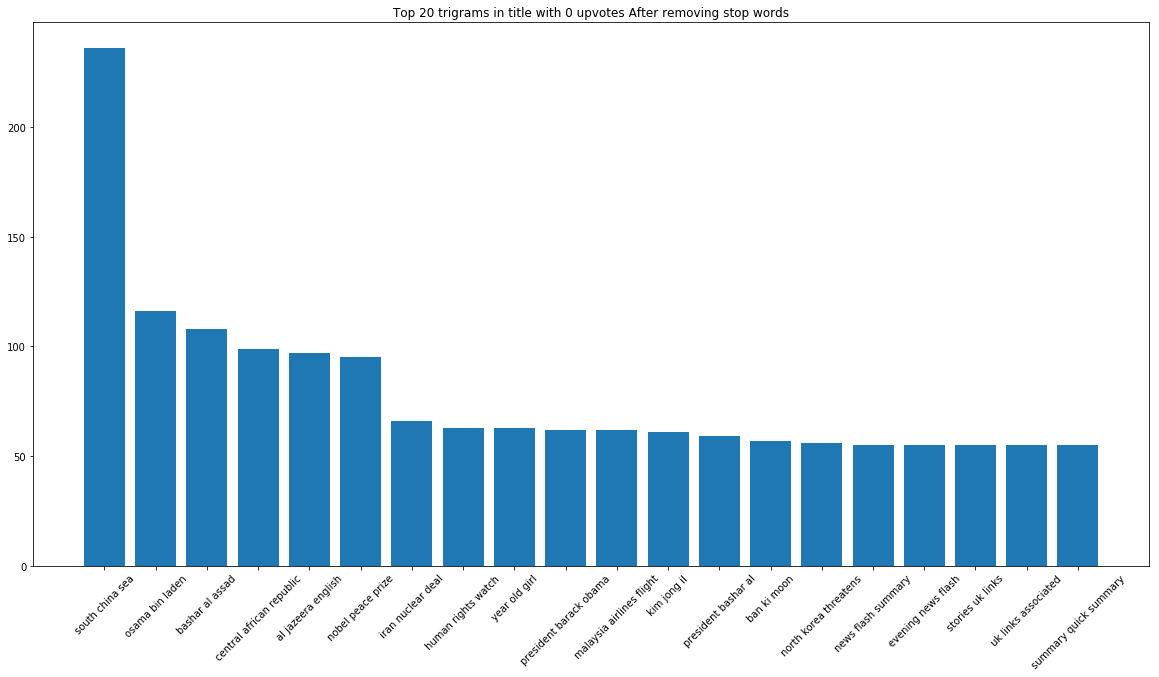

south china sea 260
year old girl 158
president vladimir putin 156
great barrier reef 143
bashar al assad 137
human rights watch 131
president barack obama 105
world war ii 97
chancellor angela merkel 96
000 year old 96
president bashar al 93
islamic state militants 93
central african republic 90
osama bin laden 89
child sex abuse 88
new york times 88
nobel peace prize 88
year old boy 83
russian president vladimir 78
trans pacific partnership 76


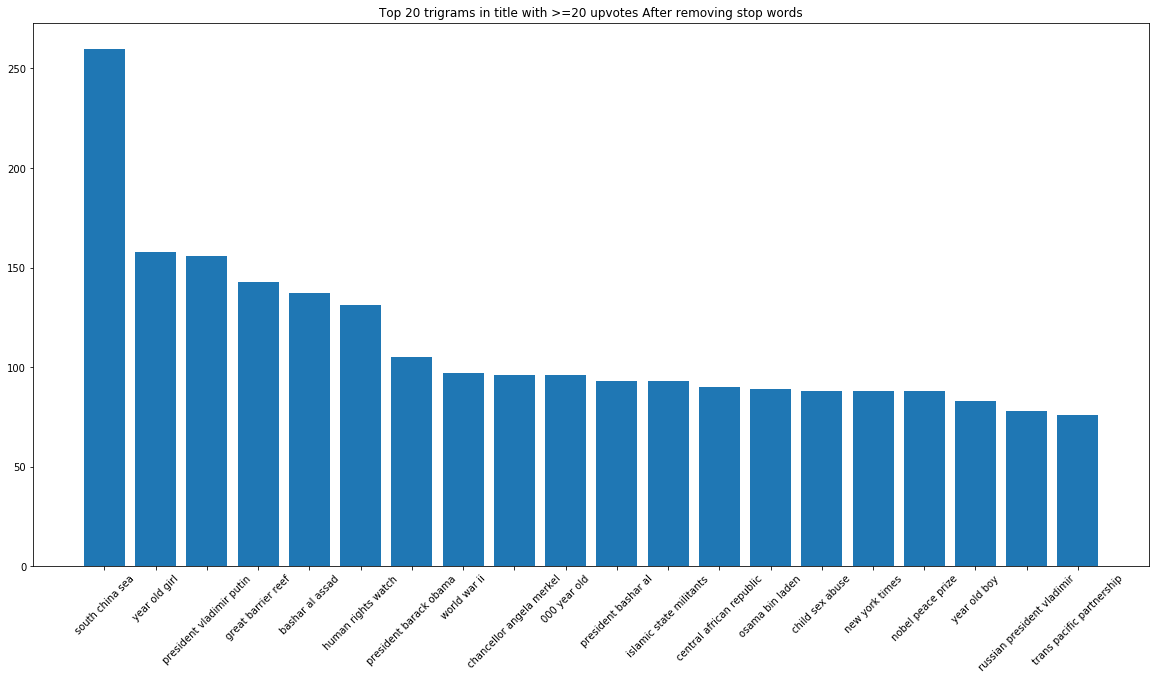

south china sea 1062
bashar al assad 422
central african republic 381
al jazeera english 313
president bashar al 282
human rights watch 253
international criminal court 217
new york times 207
osama bin laden 206
islamic state militants 205
death toll rises 202
world war ii 189
nuclear power plant 185
islamic state group 183
year old girl 182
nobel peace prize 180
aung san suu 178
san suu kyi 177
president vladimir putin 176
ban ki moon 175


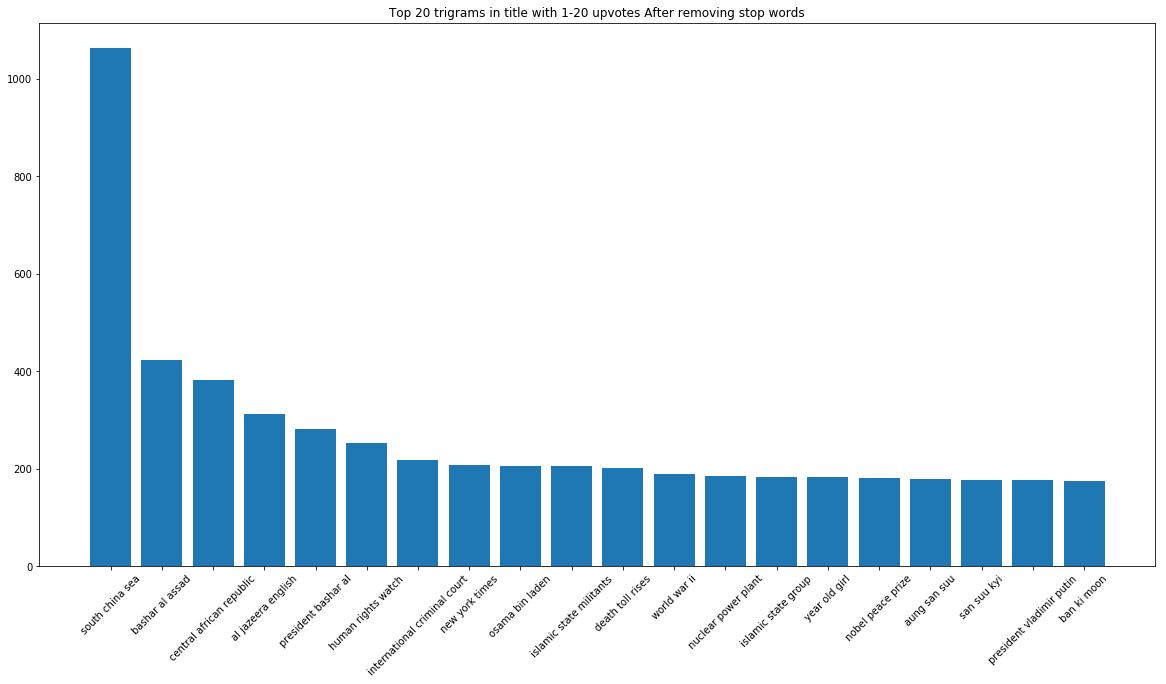

In [145]:
common_words_trigram = get_top_n_trigram(df[df['up_votes'] ==0 ]['title'], 20)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 20 trigrams in title with 0 upvotes After removing stop words')
plt.xticks(rotation=45)
plt.show()

common_words_trigram = get_top_n_trigram(df[df['up_votes'] >=20 ]['title'], 20)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 20 trigrams in title with >=20 upvotes After removing stop words')
plt.xticks(rotation=45)
plt.show()

common_words_trigram = get_top_n_trigram(df[df['up_votes'].between(1,19)]['title'], 20)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 20 trigrams in title with 1-20 upvotes After removing stop words')
plt.xticks(rotation=45)
plt.show()

In [168]:
df_by_author = df.groupby('author', as_index=False).sum().sort_values('up_votes', ascending=False)

In [173]:
a = list(df['author'].value_counts().keys())
c = list(df['author'].value_counts())

In [174]:
c_ = []
for a_ in df_by_author['author'] : 
    c_.append(c[a.index(a_)])
df_by_author['total_posts'] = c_


                     author  up_votes  down_votes  over_18  len_titles  \
62103           maxwellhill   1985416           0      0.0      601592   
36192             anutensil   1531544           0      0.0     1180468   
17720            Libertatea    832102           0      1.0      432706   
8612          DoremusJessup    584380           0      0.0      809557   
32118              Wagamaga    580121           0      0.0      274893   
21504       NinjaDiscoJesus    492582           0      1.0      312079   
61028         madazzahatter    428966           0      0.0      533968   
61021                madam1    390541           0      0.0      607168   
44158         davidreiss666    338306           0      0.0     1573817   
58836                kulkke    333311           0      0.0      206084   
69234               pnewell    297270           0      0.0      290147   
65916                nimobo    266733           0      0.0      177735   
81054             trot-trot    258367 

In [175]:
df_by_author

,author,up_votes,down_votes,over_18,len_titles,total_posts
62103,maxwellhill,1985416,0,0.0,601592,4023
36192,anutensil,1531544,0,0.0,1180468,5730
17720,Libertatea,832102,0,1.0,432706,2108
8612,DoremusJessup,584380,0,0.0,809557,5037
32118,Wagamaga,580121,0,0.0,274893,1490
21504,NinjaDiscoJesus,492582,0,1.0,312079,2448
61028,madazzahatter,428966,0,0.0,533968,2503
61021,madam1,390541,0,0.0,607168,2658
44158,davidreiss666,338306,0,0.0,1573817,8897
58836,kulkke,333311,0,0.0,206084,1199


In [179]:
df_by_author_posts = df_by_author.sort_values('total_posts', ascending=False)

In [180]:
df_by_author_posts

,author,up_votes,down_votes,over_18,len_titles,total_posts
44158,davidreiss666,338306,0,0.0,1573817,8897
36192,anutensil,1531544,0,0.0,1180468,5730
8612,DoremusJessup,584380,0,0.0,809557,5037
62103,maxwellhill,1985416,0,0.0,601592,4023
53662,igeldard,51461,0,0.0,226500,4013
71090,readerseven,209225,0,6.0,235712,3170
81403,twolf1,230031,0,2.0,210572,2923
61021,madam1,390541,0,0.0,607168,2658
65916,nimobo,266733,0,0.0,177735,2564
61028,madazzahatter,428966,0,0.0,533968,2503


pirate bay founder 11
german pirate party 8
pm david cameron 7
year old girl 6
great barrier reef 6
ttip trade deal 5
nuclear power plant 5
23 yr old 5
chancellor angela merkel 5
osama bin laden 5
100 000 people 5
atlantic bluefin tuna 5
roman catholic church 4
founder julian assange 4
german chancellor angela 4
anti government protests 4
supreme court ruling 4
south china sea 4
mexico drug war 4
anti piracy group 4
home secretary theresa 4
14 year old 4
anti piracy outfit 4
yr old girl 4
female genital mutilation 4
anti government protesters 4
phone hacking scandal 3
donald trump win 3
23 year old 3
elephant rhino poaching 3
pro democracy protests 3
cairo tahrir square 3
file sharing sites 3
student richard dwyer 3
coal oil gas 3
british pm david 3
trans pacific partnership 3
wikileaks julian assange 3
internet file sharing 3
supreme court says 3
kim jong il 3
national security agency 3
genetically modified crops 3
whistleblower edward snowden 3
kim dotcom extradition 3
london met pol

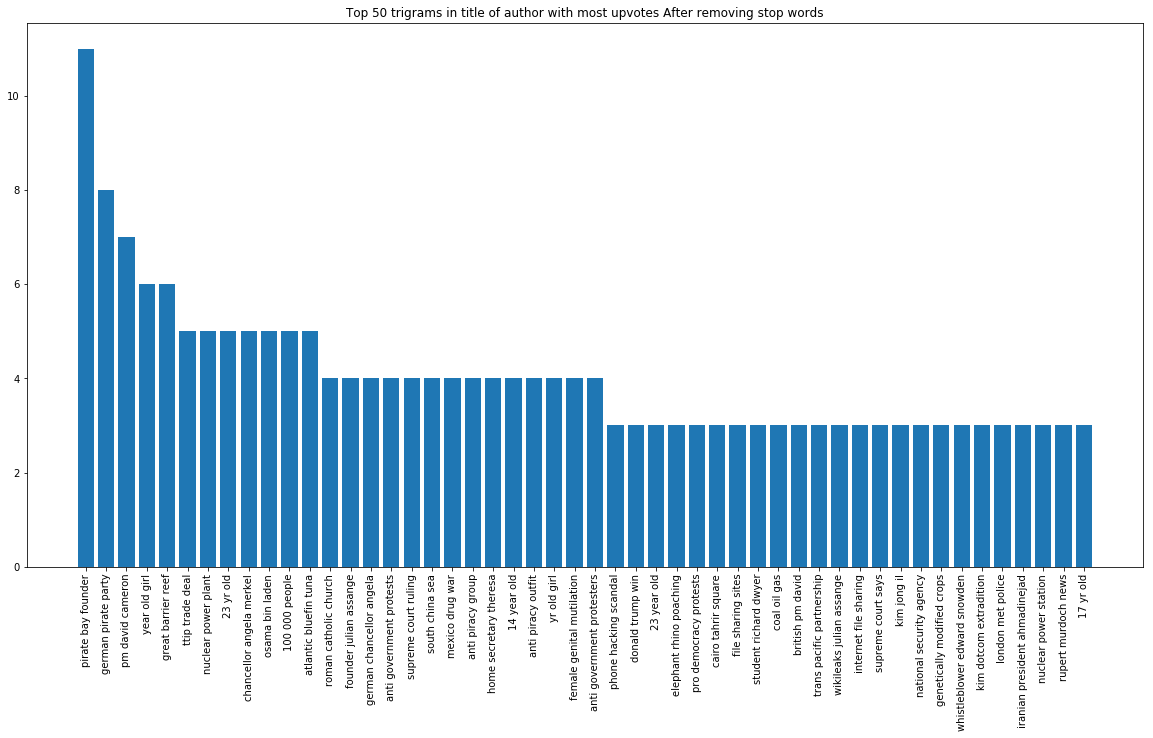

In [178]:
common_words_trigram = get_top_n_trigram(df[df['author'] == 'maxwellhill']['title'], 50)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 50 trigrams in title of author with most upvotes After removing stop words')
plt.xticks(rotation=90)
plt.show()

bashar al assad 51
president bashar al 43
central african republic 40
chancellor angela merkel 36
aung san suu 33
san suu kyi 33
president vladimir putin 30
south china sea 26
international criminal court 26
syrian president bashar 24
ban ki moon 24
democratic republic congo 24
president mohammed morsi 22
president hugo chavez 20
german chancellor angela 19
new prime minister 18
anti government protests 18
president bashar assad 16
president mohamed morsi 16
president hosni mubarak 15
president dilma rousseff 15
nobel peace prize 15
european central bank 14
human rights watch 14
anti government protesters 14
turkish prime minister 14
east china sea 13
recep tayyip erdogan 13
south african president 13
al qaeda linked 13
world war ii 13
syria civil war 13
president xi jinping 12
ali abdullah saleh 12
international monetary fund 12
fired tear gas 11
prime minister david 11
president jacob zuma 11
president robert mugabe 11
human rights activists 11
president francois hollande 11
presiden

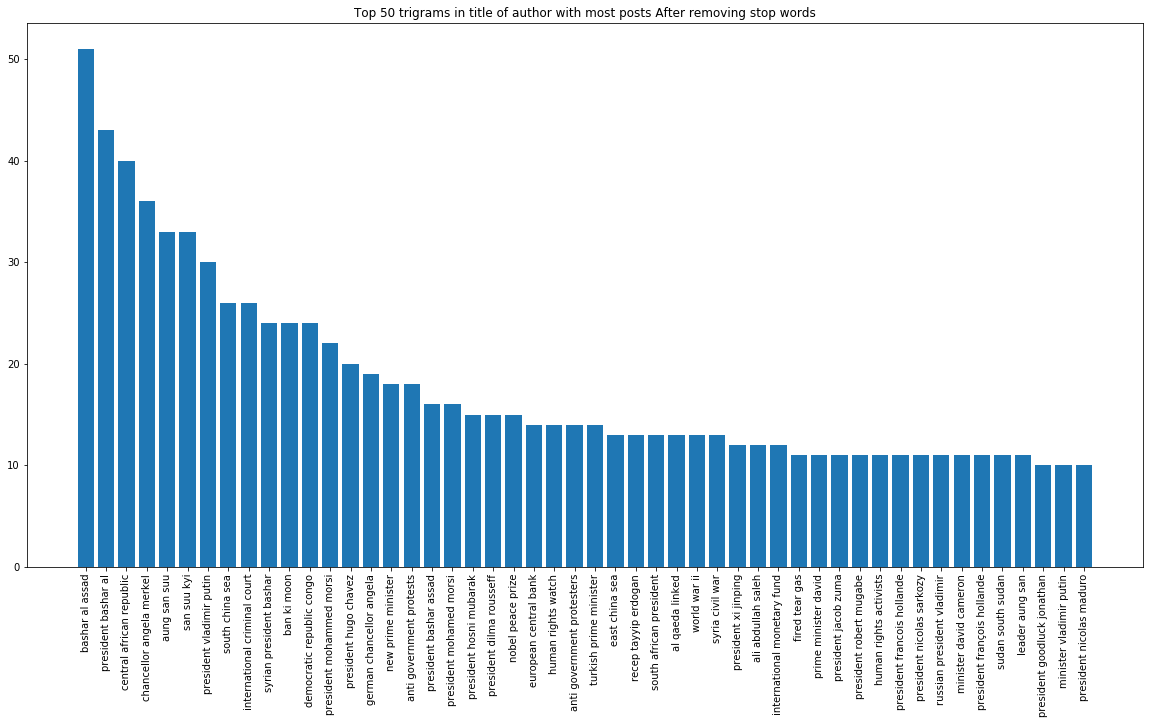

In [181]:
common_words_trigram = get_top_n_trigram(df[df['author'] == 'davidreiss666']['title'], 50)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 50 trigrams in title of author with most posts After removing stop words')
plt.xticks(rotation=90)
plt.show()

In [183]:
top50_author_by_upvote = df_by_author[:50]['author']
top50_author_by_posts = df_by_author_posts[:50]['author']

south china sea 398
bashar al assad 251
president bashar al 199
president vladimir putin 164
central african republic 151
prime minister shinzo 144
minister shinzo abe 144
chancellor angela merkel 143
great barrier reef 142
islamic state group 141
islamic state militants 141
president barack obama 125
world war ii 123
international criminal court 122
human rights watch 101
syrian president bashar 94
islamic state iraq 90
ban ki moon 90
osama bin laden 90
greenhouse gas emissions 84
nuclear power plant 84
recep tayyip erdogan 72
russian president vladimir 71
german chancellor angela 70
san suu kyi 69
aung san suu 69
minister benjamin netanyahu 68
world health organization 67
prime minister benjamin 67
fight islamic state 67
state john kerry 66
secretary state john 66
fukushima nuclear plant 66
year old girl 65
united arab emirates 63
democratic republic congo 61
president bashar assad 59
leader kim jong 59
president dilma rousseff 58
prime minister david 58
minister david cameron 58
000

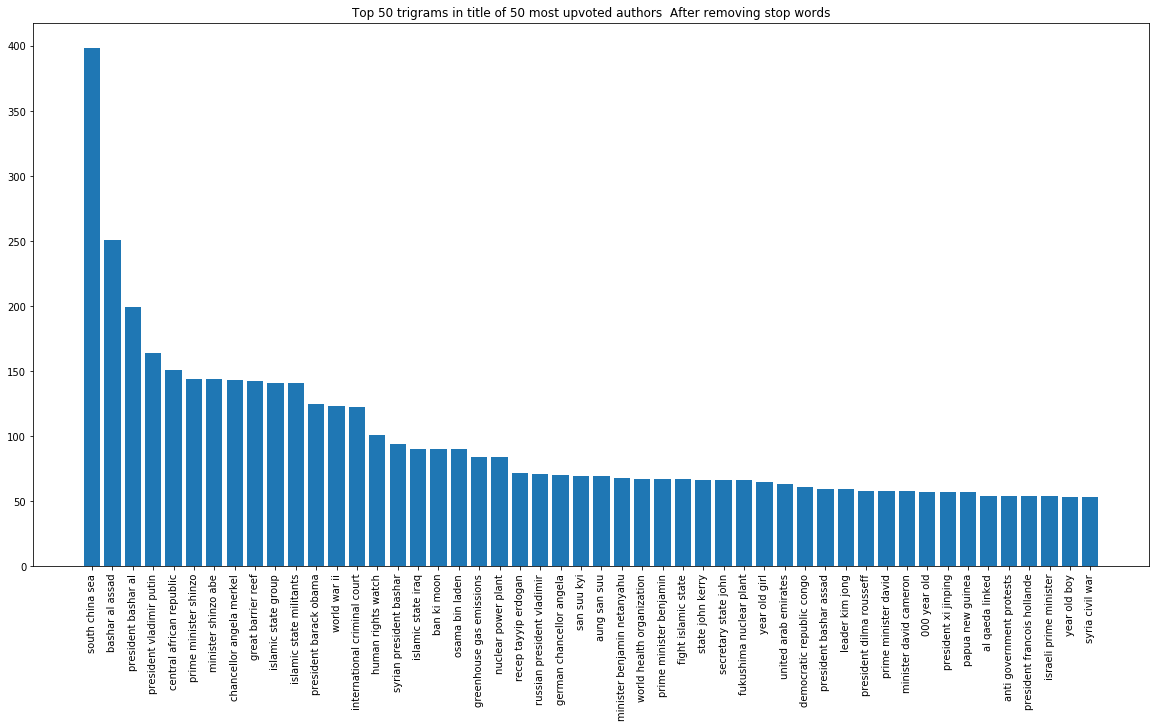

In [196]:
common_words_trigram = get_top_n_trigram(df[df['author'].isin(top50_author_by_upvote)]['title'], 50)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 50 trigrams in title of 50 most upvoted authors  After removing stop words')
plt.xticks(rotation=90)
plt.show()

south china sea 434
bashar al assad 290
president bashar al 229
central african republic 195
chancellor angela merkel 156
president vladimir putin 151
human rights watch 149
prime minister shinzo 148
minister shinzo abe 148
world war ii 136
president barack obama 135
islamic state group 134
great barrier reef 134
islamic state militants 133
international criminal court 130
osama bin laden 118
syrian president bashar 106
ban ki moon 100
islamic state iraq 88
greenhouse gas emissions 83
nuclear power plant 83
german chancellor angela 83
kim jong il 80
democratic republic congo 77
papua new guinea 76
san suu kyi 74
aung san suu 74
president bashar assad 73
year old girl 72
russian president vladimir 71
syria civil war 70
recep tayyip erdogan 69
minister benjamin netanyahu 68
world health organization 67
prime minister benjamin 67
al qaeda linked 66
united arab emirates 65
nobel peace prize 65
fight islamic state 64
leader kim jong 63
minister david cameron 62
fukushima nuclear plant 62
pr

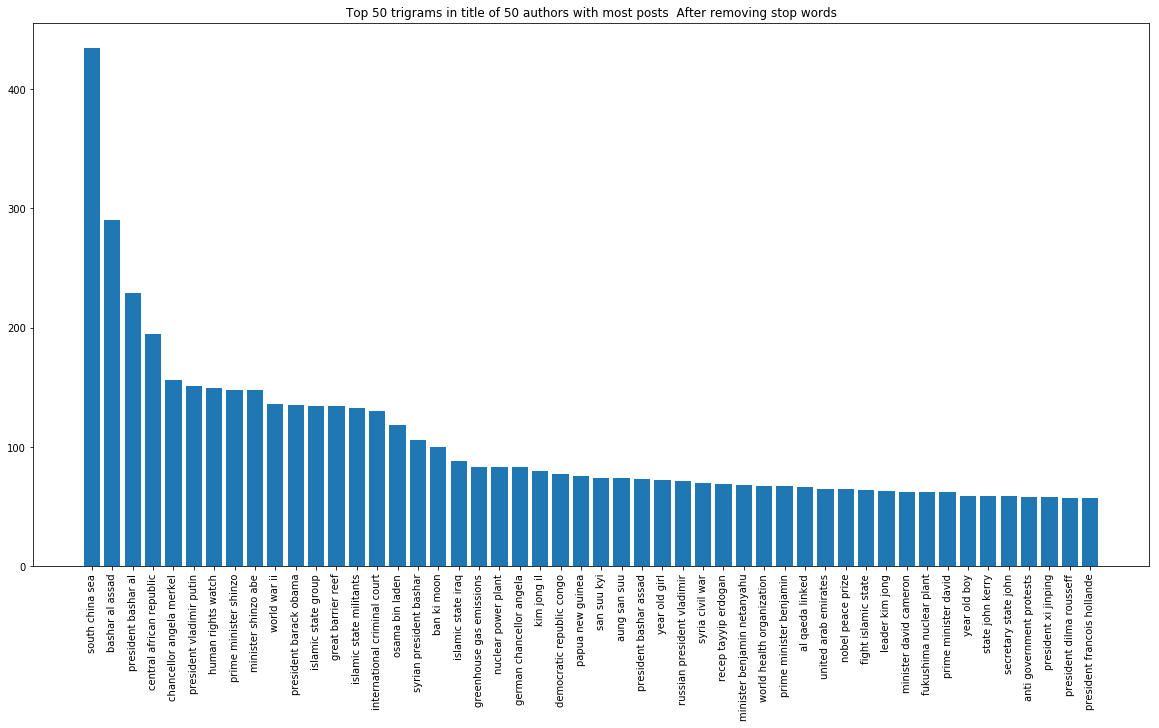

In [197]:
common_words_trigram = get_top_n_trigram(df[df['author'].isin(top50_author_by_posts)]['title'], 50)

for word, freq in common_words_trigram:
    print(word, freq)
plt.bar([v[0] for v in common_words_trigram], [v[1] for v in common_words_trigram])
plt.title('Top 50 trigrams in title of 50 authors with most posts  After removing stop words')
plt.xticks(rotation=90)
plt.show()